C:\Users\lenovo\AppData\Local\Temp\ipykernel_20380\3010125762.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(a,cmap='gray')


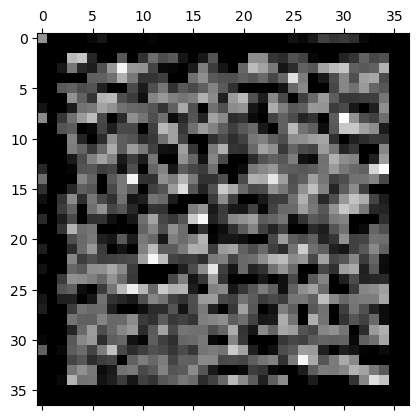

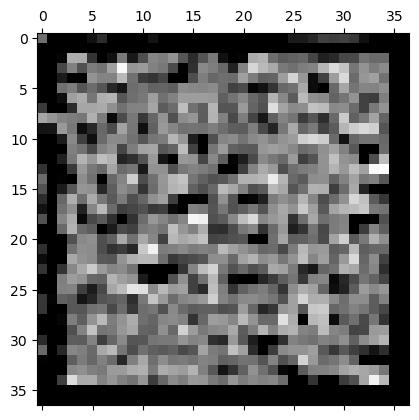

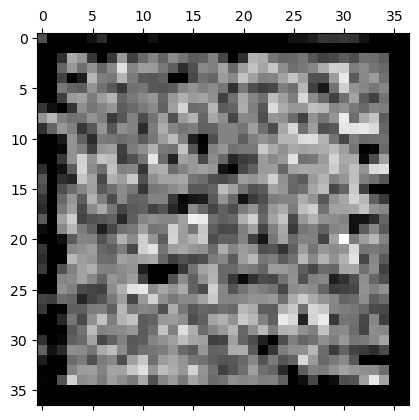

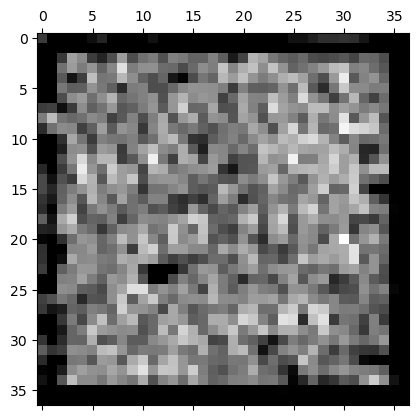

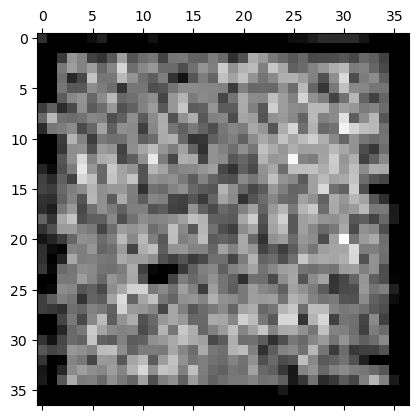

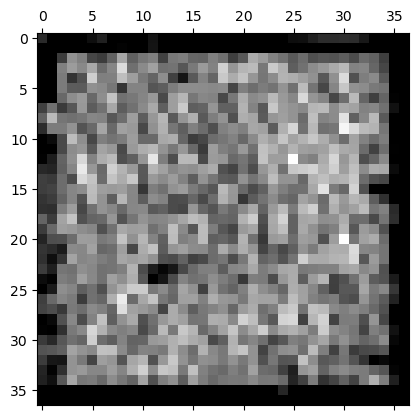

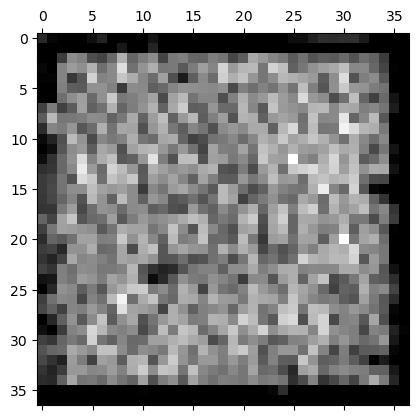

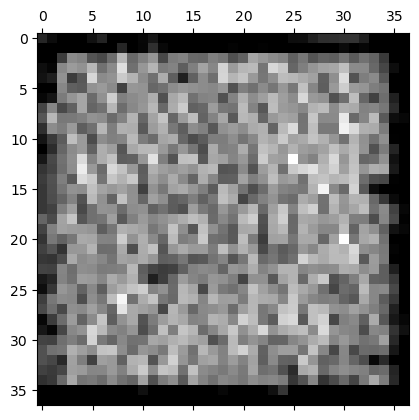

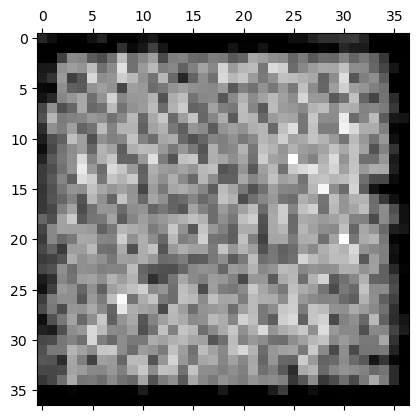

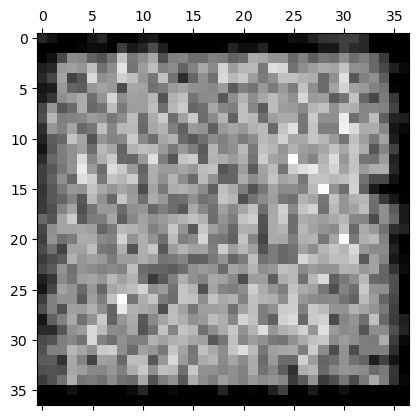

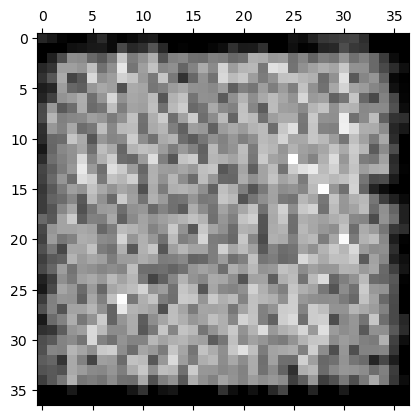

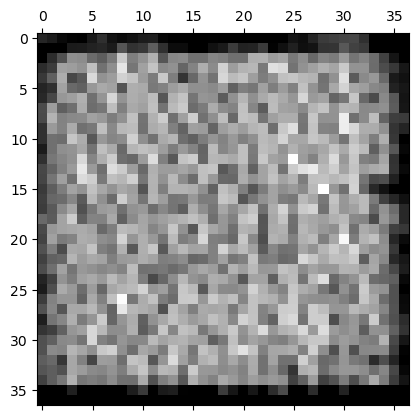

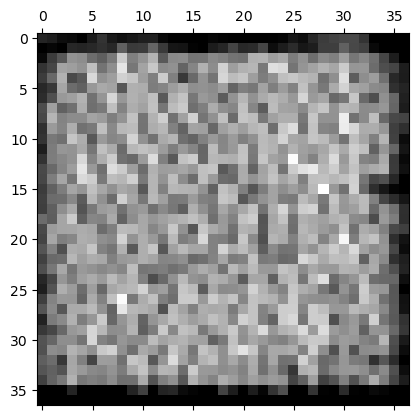

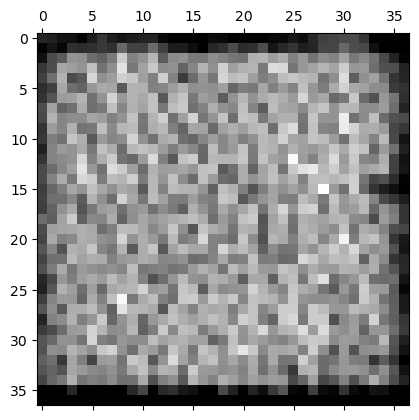

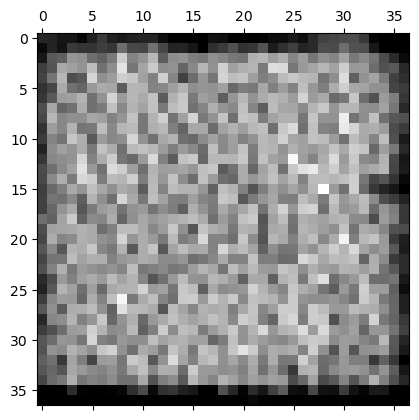

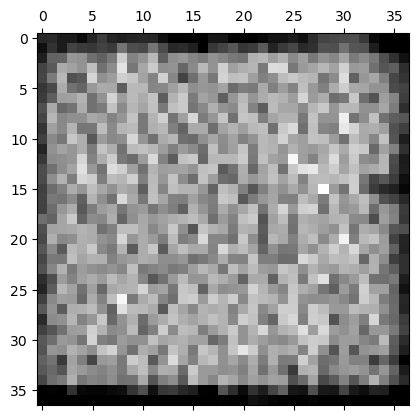

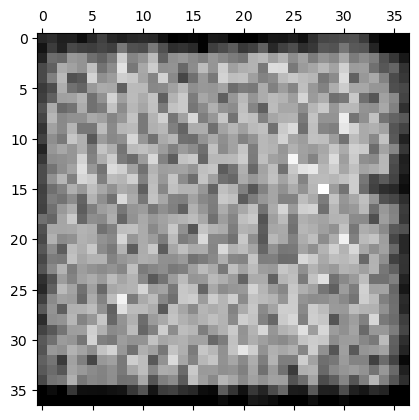

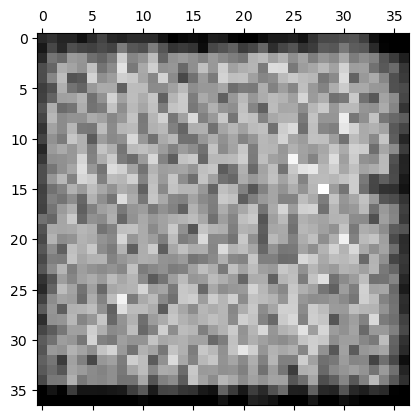

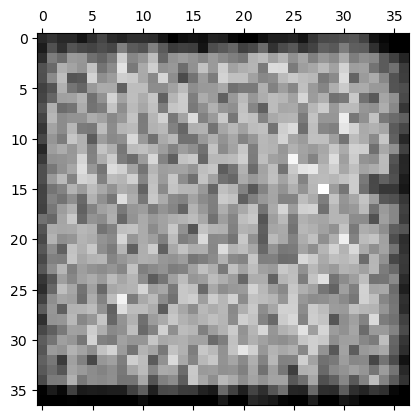

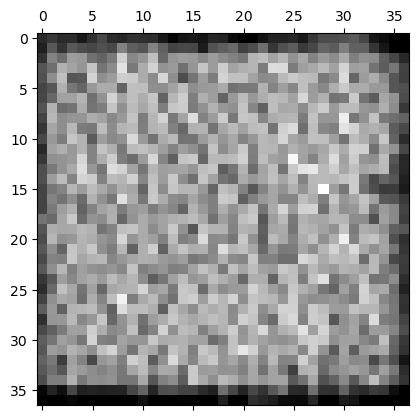

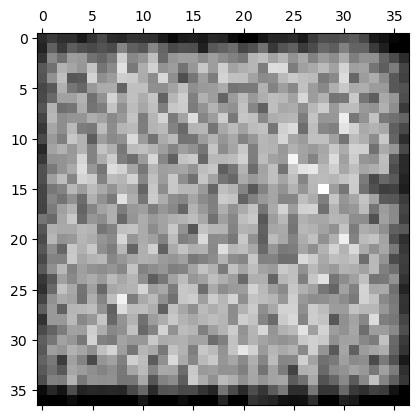

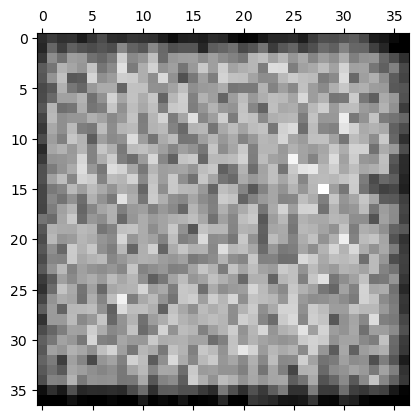

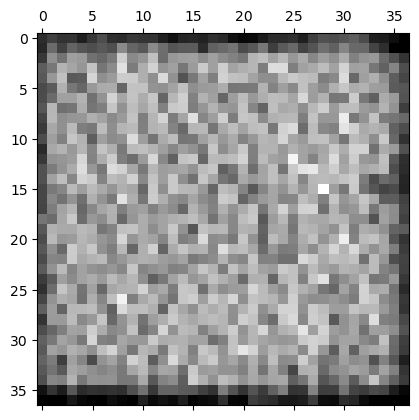

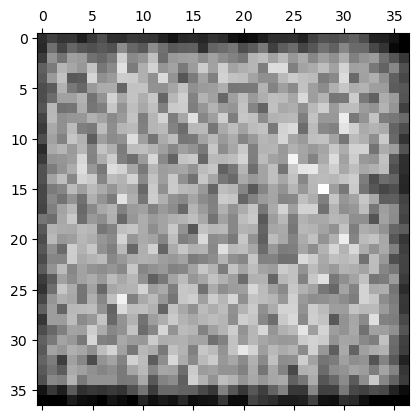

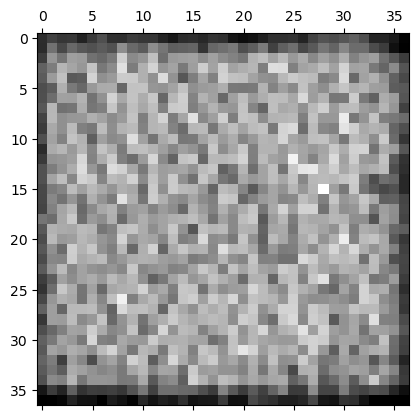

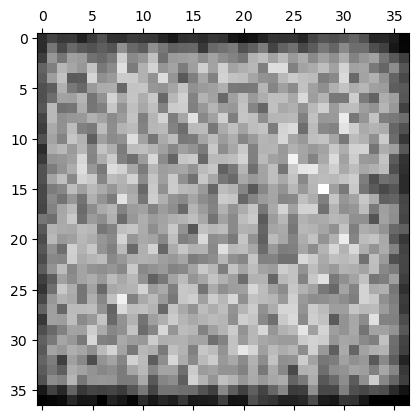

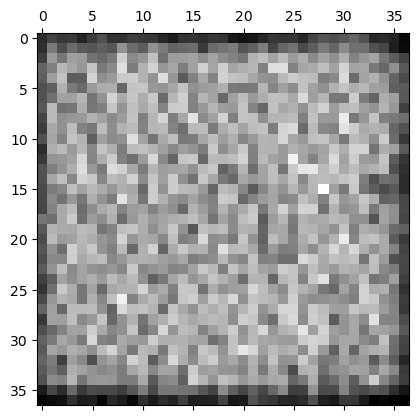

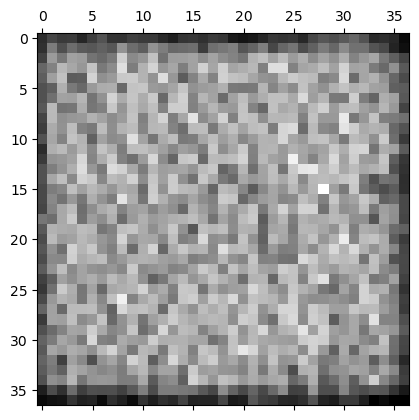

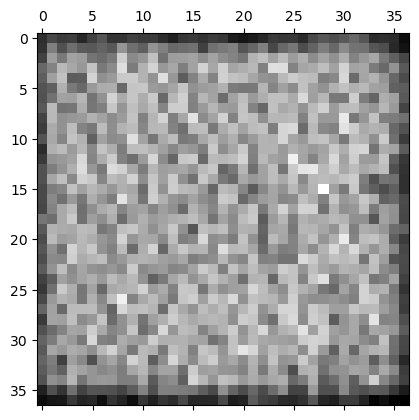

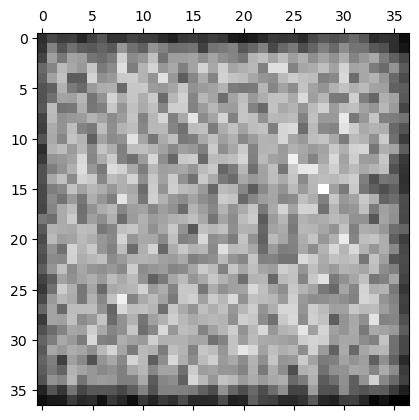

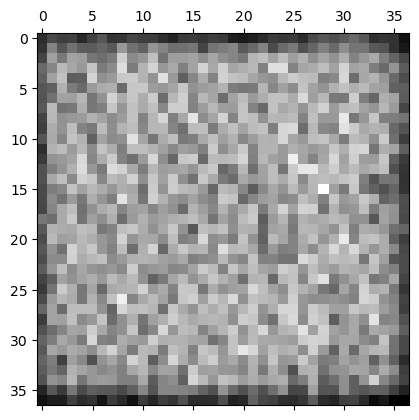

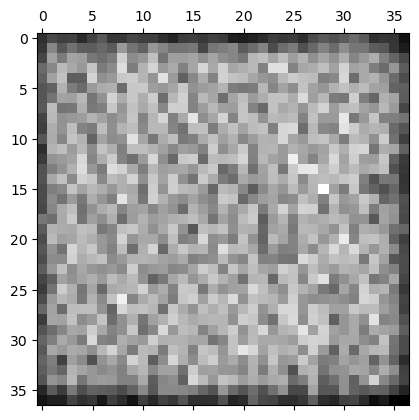

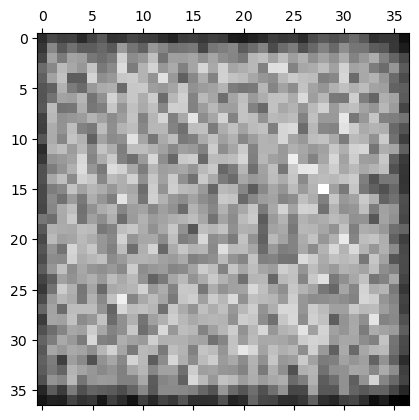

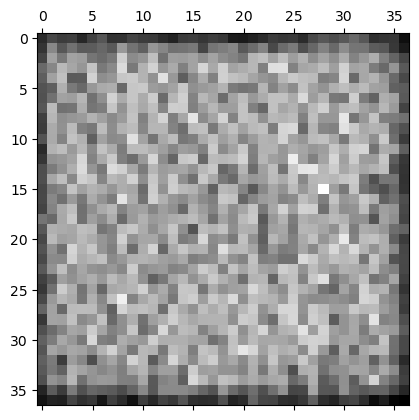

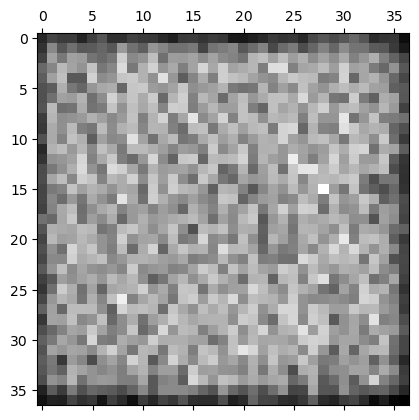

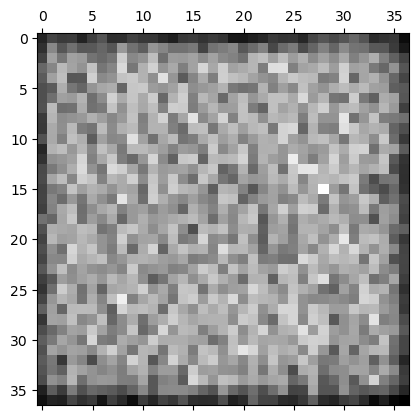

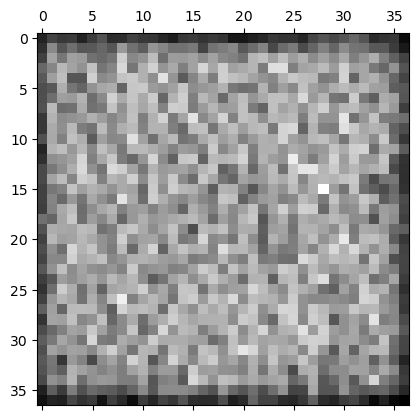

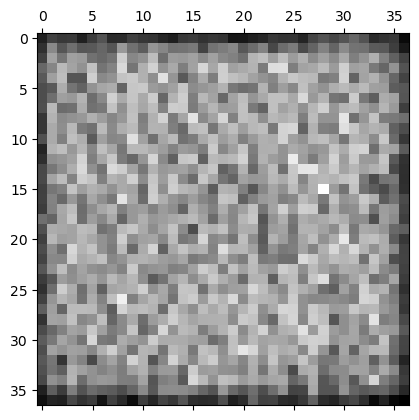

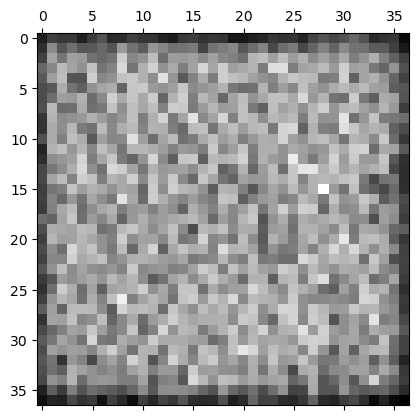

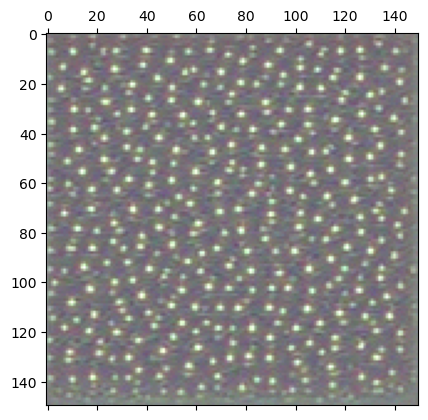

In [34]:
from keras import applications
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model,Model,Sequential
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

model = applications.VGG16(include_top=False,weights='imagenet')

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std()+1e-5)
    x*=0.1
    
    x+=0.5
    x=np.clip(x,0,1)
    x*=255
    x=np.clip(x,0,255).astype('uint8')
    
    return x

def generate_pattern(layer_name,filter_index,size=150):
    layer_output=model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    grads = K.gradients(loss,model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5)
    iterate = K.function([model.input],[loss,grads,layer_output[0,:,:,filter_index]])
    input_img_data = np.random.random((1,150,150,3))*20+128
    
    step=1
    for i in range(40):
        loss_value,grads_value,a = iterate([input_img_data])
        input_img_data += grads_value*step
        
        plt.matshow(a,cmap='gray')
        
    
    img = input_img_data[0]
    

    return deprocess_image(img)

a=generate_pattern('block3_conv1',0)
plt.imshow(a)
